In [1]:
%run -m ipy_startup
%run -m ipy_logging
%run -m ipy_plotly
%run -m ipy_seaborn
%matplotlib inline
from musc_genomics import data
from musc_genomics.data_modeling import modeling, features, prepared
from ml.model import models as ml_model
from ml.model import summaries as ml_precis
pd.set_option('max_info_rows', 10000)

2016-08-06 19:18:00,334:INFO:requests.packages.urllib3.connectionpool: Starting new HTTPS connection (1): api.plot.ly


In [2]:
d, na_summary, fill_summary, imp_summary = prepared.get_modeling_data_01('maximal_02', impute_response=False)

2016-08-06 19:18:02,229:DEBUG:research.project.manager: Loading saved data from location "/Users/eczech/data/research/musc_genomics/features/encode_maximal_02.pkl"


In [3]:
na_summary

OVER_THRESHOLD,False,True,Axis,PctTrue
FEATURE_GROUP,,,,
GE,637,5,rowwise,0.778816
CN,639,3,rowwise,0.467290
MU:AAC,587,55,rowwise,8.566978
CL:CANCER_TYPE,3,0,colwise,0.000000
CL:GENDER,3,0,colwise,0.000000
CL:HISTOLOGY,20,0,colwise,0.000000
CL:PRIMARY_SITE,24,0,colwise,0.000000
CN,20381,0,colwise,0.000000
GE,16042,0,colwise,0.000000


In [4]:
d.head()

,,,FEATURE,CN:A1BG,CN:A1BG-AS1,CN:A1CF,CN:A2M,CN:A2ML1,CN:A4GALT,CN:A4GNT,CN:AAAS,CN:AACS,CN:AACSP1,...,RES:other:TIE2:KIN001-236,RES:other:TNF alpha:Lenalidomide,"RES:other:TPL2,COT(M3K8):KIN001-266",RES:other:gamma-secretase:BMS-708163,RES:other:gamma-secretase:Z-LLNle-CHO,RES:other:unknown:FH535,RES:other:unknown:Shikonin,RES:p53 pathway:MDM2:JNJ-26854165,RES:p53 pathway:MDM2:Nutlin-3a (-),RES:p53 pathway:MDMX:NSC-207895
TUMOR_ID,RES:CANCER_TYPE,RES:SITE,RES:HISTOLOGY,,,,,,,,,,,,,,,,,,,,,
22RV1,PRAD,prostate,carcinoma,-0.08084,-0.08084,-0.00250,0.4486,0.4486,-0.05740,-0.03030,0.46490,0.4406,-0.0518,...,4.096331,4.454144,3.272366,3.650493,NaN,1.101590,1.203081,2.835527,2.403369,3.704255
2313287,STAD,stomach,carcinoma,-0.03310,-0.03310,-0.05348,-0.1917,-0.1917,-0.05120,-0.04608,-0.01474,-0.0516,-0.0514,...,4.749415,4.292865,2.895975,4.050002,NaN,1.296307,0.261285,2.493011,2.906627,3.111120
42MGBA,GBM,central_nervous_system,glioma,0.03220,0.03220,-0.05220,-0.3905,-0.3905,-0.01630,-0.26860,-0.30590,0.0857,0.2794,...,4.132734,3.587407,2.935137,4.184062,NaN,3.751758,0.643791,1.671162,4.320196,5.724220
5637,BLCA,urinary_tract,carcinoma,-0.03514,-0.03514,-0.49350,-0.0657,-0.0657,-0.03961,0.05133,0.01120,0.3015,0.4044,...,4.579042,3.862487,2.575704,4.110246,NaN,1.993463,2.522932,1.411154,4.193885,2.780774
639V,BLCA,urinary_tract,carcinoma,0.08280,0.08280,0.05900,0.3126,0.3126,0.33200,0.09990,-0.08414,-0.1396,0.0901,...,4.417683,2.437845,3.260532,4.041213,NaN,0.604865,-1.408402,2.062012,2.699072,2.423240


In [1]:
features.get_feature_type_counts(d.columns)

NameError: name 'features' is not defined

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.dummy import DummyRegressor
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, f_regression


def partition_modeling_data(d, response):
    X, y = d.drop(response, axis=1), d[response]
    return X, y
    
def get_modeling_results(d, response):
    X, y = partition_modeling_data(d, response)
    
    cv = KFold(len(y), 10, shuffle=True, random_state=1)


    clf_rf = Pipeline([
        ('filter', VarianceThreshold(threshold=.05)),
        #('select', SelectKBest(f_regression2, k=10000)),
        ('clf', RandomForestRegressor())
    ])
    clf_etr = Pipeline([
        ('filter', VarianceThreshold(threshold=.05)),
        #('select', SelectKBest(f_regression2, k=10000)),
        ('clf', ExtraTreesRegressor())
    ])
    clf_xgb = Pipeline([
        ('filter', VarianceThreshold(threshold=.05)),
        #('select', SelectKBest(f_regression2, k=10000)),
        ('clf', XGBRegressor())
    ])
    clf_lasso = Pipeline([
        ('filter', VarianceThreshold(threshold=.05)),
        ('scale', StandardScaler()),
        ('clf', LassoCV())
    ])
    clfs = {
        'rf': clf_rf,
        'etr': clf_etr,
        'xgb': clf_xgb,
        'lasso': clf_lasso,
        'baseline': DummyRegressor()
    }

    n_jobs = 1 # Do not change this, change n_jobs in models instead
    cv_res, refit_res = ml_model.run_models(
        X, y, clfs, cv, 'regressor', 
        keep_training_data=False, par_n_jobs=n_jobs, 
        refit=True
    )
    return cv_res, refit_res

In [6]:
d.filter(regex='^RES:').info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 381 entries, (22RV1, urogenital_system, prostate) to (ZR7530, breast, breast)
Data columns (total 6 columns):
RES:VAL:ABT-263       381 non-null float64
RES:VAL:AG-014699     381 non-null float64
RES:VAL:NUTLIN-3A     381 non-null float64
RES:VAL:PD-0332991    381 non-null float64
RES:VAL:PLX4720       381 non-null float64
RES:VAL:SB590885      381 non-null float64
dtypes: float64(6)
memory usage: 20.8+ KB


In [11]:
responses = d.filter(regex='^RES:').columns

results = {}
for response in responses:
    print('Running models for response "{}"'.format(response))
    results[response] = get_modeling_results(d, response)
print('Model training complete')

Running models for response "RES:VAL:ABT-263"
Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


2016-07-25 07:20:11,151:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 07:20:11,172:INFO:ml.model.log: Running model xgb (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 07:21:13,947:INFO:ml.model.log: Running model lasso (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 07:23:30,902:INFO:ml.model.log: Running model rf (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 07:24:17,927:INFO:ml.model.log: Running model etr (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 07:24:45,837:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 07:24:45,843:INFO:ml.model.log: Running model xgb (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 07:25:4

Running models for response "RES:VAL:AG-014699"


2016-07-25 08:09:14,434:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:09:14,449:INFO:ml.model.log: Running model xgb (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)


Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


2016-07-25 08:10:14,015:INFO:ml.model.log: Running model lasso (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:12:22,706:INFO:ml.model.log: Running model rf (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:13:03,847:INFO:ml.model.log: Running model etr (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:13:28,843:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 08:13:28,848:INFO:ml.model.log: Running model xgb (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 08:14:27,856:INFO:ml.model.log: Running model lasso (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
/Users/eczech/anaconda/envs/research3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning:

Objective did not converge.

Running models for response "RES:VAL:NUTLIN-3A"
Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


2016-07-25 08:56:42,259:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:56:42,274:INFO:ml.model.log: Running model xgb (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:57:43,029:INFO:ml.model.log: Running model lasso (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 08:59:13,649:INFO:ml.model.log: Running model rf (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:00:02,894:INFO:ml.model.log: Running model etr (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:00:31,616:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 09:00:31,621:INFO:ml.model.log: Running model xgb (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 09:01:2

Running models for response "RES:VAL:PD-0332991"
Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


2016-07-25 09:37:51,941:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:37:51,956:INFO:ml.model.log: Running model xgb (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:38:47,748:INFO:ml.model.log: Running model lasso (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:40:16,005:INFO:ml.model.log: Running model rf (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:40:59,498:INFO:ml.model.log: Running model etr (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 09:41:26,665:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 09:41:26,670:INFO:ml.model.log: Running model xgb (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 09:42:2

Running models for response "RES:VAL:PLX4720"
Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


2016-07-25 10:19:03,946:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 10:19:03,959:INFO:ml.model.log: Running model xgb (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 10:20:04,518:INFO:ml.model.log: Running model lasso (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 10:21:30,646:INFO:ml.model.log: Running model rf (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 10:22:17,117:INFO:ml.model.log: Running model etr (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 10:22:47,166:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 10:22:47,172:INFO:ml.model.log: Running model xgb (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 10:23:4

Running models for response "RES:VAL:SB590885"
Beginning cross validation (see /tmp/ml-models-exec.log for progress updates)


2016-07-25 11:01:44,401:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 11:01:44,413:INFO:ml.model.log: Running model xgb (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 11:02:43,103:INFO:ml.model.log: Running model lasso (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 11:04:09,038:INFO:ml.model.log: Running model rf (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 11:05:08,577:INFO:ml.model.log: Running model etr (Pipeline) on fold 1 ==> dim(train) = (342, 73249), dim(test) = (39, 73249)
2016-07-25 11:05:40,486:INFO:ml.model.log: Running model baseline (DummyRegressor) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 11:05:40,492:INFO:ml.model.log: Running model xgb (Pipeline) on fold 2 ==> dim(train) = (343, 73249), dim(test) = (38, 73249)
2016-07-25 11:06:4

Model training complete


In [ ]:
data.save('modeling', 'single_task_models', (cv_res, refit_res))
#(cv_res, refit_res) = data.load('modeling', 'single_task_models')

In [18]:
d_pp = pd.concat([
        ml_model.summarize_predictions(results[k][0]).assign(drug=k).assign(row_id=lambda x: np.arange(len(x)))
        for k, v in results.items()
    ])\
    .assign(drug_name=lambda x: x['drug'].str.split(':').str[-1])\
    .drop('drug', axis=1)
d_pp.head()

,y_pred,y_true,model_name,fold_id,row_id,drug_name
0,2.42935,4.510450,baseline,1,0,ABT-263
1,2.42935,-2.093952,baseline,1,1,ABT-263
2,2.42935,1.359720,baseline,1,2,ABT-263
3,2.42935,0.182912,baseline,1,3,ABT-263
4,2.42935,-0.106215,baseline,1,4,ABT-263


In [19]:
data.save('modeling', 'single_task_pred', d_pp)
#d_pp = data.load('modeling', 'single_task_pred')

2016-07-25 13:05:03,578:DEBUG:research.project.manager: Saving data to location "/Users/eczech/data/research/musc_genomics/modeling/single_task_pred.pkl"


'/Users/eczech/data/research/musc_genomics/modeling/single_task_pred.pkl'

In [16]:
d_pp.head()

,y_pred,y_true,model_name,fold_id,drug
0,2.42935,4.510450,baseline,1,RES:VAL:ABT-263
1,2.42935,-2.093952,baseline,1,RES:VAL:ABT-263
2,2.42935,1.359720,baseline,1,RES:VAL:ABT-263
3,2.42935,0.182912,baseline,1,RES:VAL:ABT-263
4,2.42935,-0.106215,baseline,1,RES:VAL:ABT-263


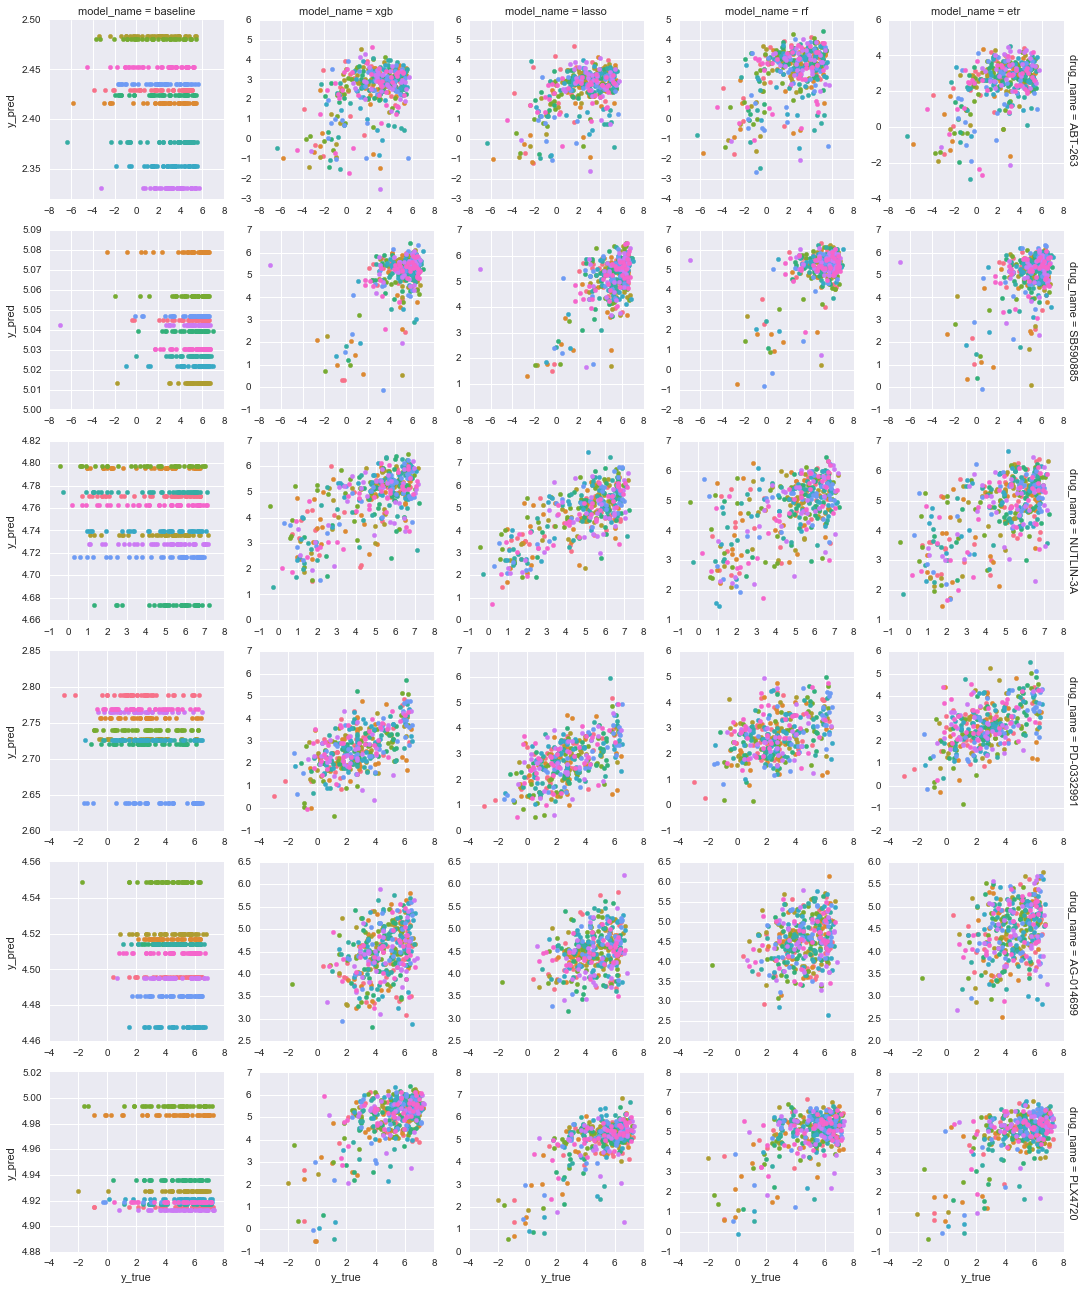

In [22]:
g = sns.FacetGrid(
    d_pp, row='drug_name', col='model_name', hue='fold_id', 
    margin_titles=True, sharex=False, sharey=False
)
g.map(plt.scatter, 'y_true', 'y_pred')

In [23]:
from sklearn.metrics import r2_score
def get_score(g):
    return r2_score(g['y_true'], g['y_pred'])
d_perf = d_pp.groupby(['model_name', 'drug_name', 'fold_id']).apply(get_score)\
    .rename('score').reset_index()
d_perf.head()

,model_name,drug_name,fold_id,score
0,baseline,ABT-263,1,-0.001996
1,baseline,ABT-263,2,-0.000056
2,baseline,ABT-263,3,-0.097695
3,baseline,ABT-263,4,-0.069428
4,baseline,ABT-263,5,-0.000669


In [24]:
data.save('modeling', 'single_task_perf', d_perf)

2016-07-25 13:07:51,758:DEBUG:research.project.manager: Saving data to location "/Users/eczech/data/research/musc_genomics/modeling/single_task_perf.pkl"


'/Users/eczech/data/research/musc_genomics/modeling/single_task_perf.pkl'

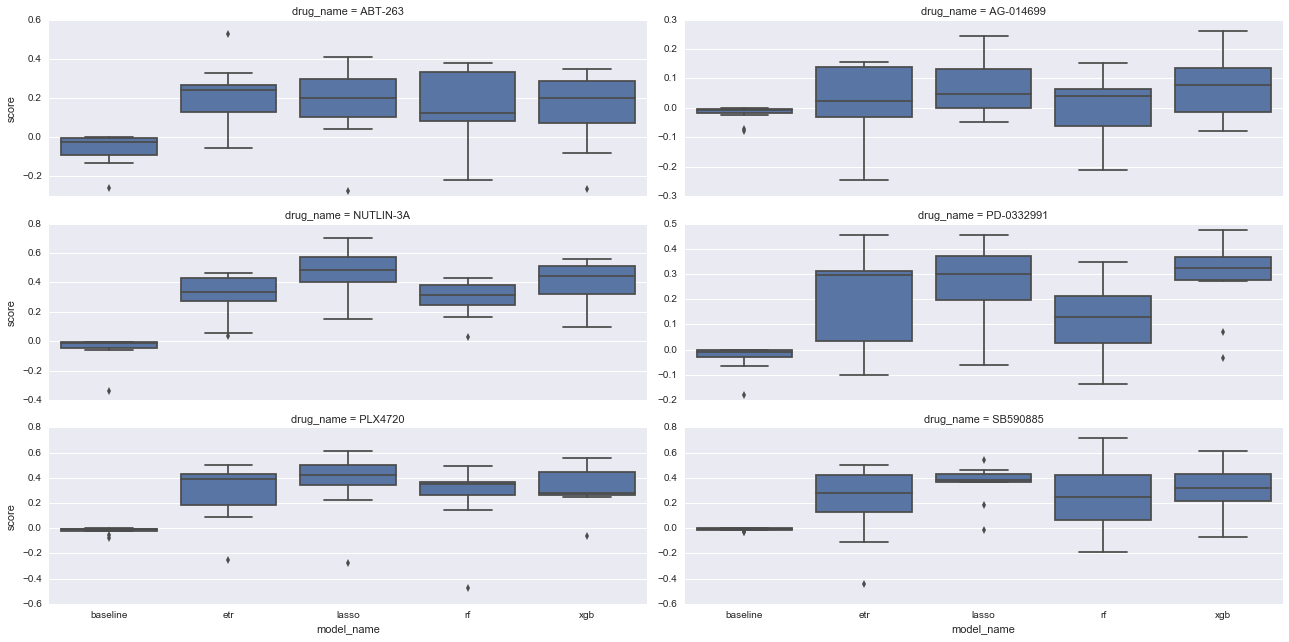

In [25]:
plt.figure(figsize=(8,12))
sns.FacetGrid(d_perf, col='drug_name', size=3, aspect=3, sharey=False, col_wrap=2)\
    .map(sns.boxplot, 'model_name', 'score')